# sklearn应用之员工离职预测

## 任务介绍
用Logistic回归方法，解决DataCastle中员工离职预测训练赛的问题。<br>
### 任务描述
从给定的影响员工离职的因素和员工是否离职的记录，建立一个逻辑回归模型预测有可能离职的员工。
### 数据
数据主要包括影响员工离职的各种因素（工资、出差、工作环境满意度、工作投入度、是否加班、是否升职、工资提升比例等）以及员工是否已经离职的对应记录。<br>
数据分为训练数据和测试数据，分别保存在pfm_train.csv和pfm_test.csv两个文件中。

其中训练数据主要包括1100条记录，31个字段，主要字段说明如下：<br>
（1）Age：员工年龄<br>
（2）Attrition：员工是否已经离职，1表示已经离职，2表示未离职，这是目标预测值；<br>
（3）BusinessTravel：商务差旅频率，Non-Travel表示不出差，Travel_Rarely表示不经常出差，Travel_Frequently表示经常出差；<br>
（4）Department：员工所在部门，Sales表示销售部，Research & Development表示研发部，Human Resources表示人力资源部；<br>
（5）DistanceFromHome：公司跟家庭住址的距离，从1到29，1表示最近，29表示最远；<br>
（6）Education：员工的教育程度，从1到5，5表示教育程度最高；<br>
（7）EducationField：员工所学习的专业领域，Life Sciences表示生命科学，Medical表示医疗，Marketing表示市场营销，Technical Degree表示技术学位，Human Resources表示人力资源，Other表示其他；<br>
（8）EmployeeNumber：员工号码；<br>
（9）EnvironmentSatisfaction：员工对于工作环境的满意程度，从1到4，1的满意程度最低，4的满意程度最高；<br>
（10）Gender：员工性别，Male表示男性，Female表示女性；<br>
（11）JobInvolvement：员工工作投入度，从1到4，1为投入度最低，4为投入度最高；<br>
（12）JobLevel：职业级别，从1到5，1为最低级别，5为最高级别；<br>
（13）JobRole：工作角色：Sales Executive是销售主管，Research Scientist是科学研究员，Laboratory Technician实验室技术员，Manufacturing Director是制造总监，Healthcare Representative是医疗代表，Manager是经理，Sales Representative是销售代表，Research Director是研究总监，Human Resources是人力资源；<br>
（14）JobSatisfaction：工作满意度，从1到4，1代表满意程度最低，4代表满意程度最高；<br>
（15）MaritalStatus：员工婚姻状况，Single代表单身，Married代表已婚，Divorced代表离婚；<br>
（16）MonthlyIncome：员工月收入，范围在1009到19999之间；<br>
（17）NumCompaniesWorked：员工曾经工作过的公司数；<br>
（18）Over18：年龄是否超过18岁；<br>
（19）OverTime：是否加班，Yes表示加班，No表示不加班；<br>
（20）PercentSalaryHike：工资提高的百分比；<br>
（21）PerformanceRating：绩效评估；<br>
（22）RelationshipSatisfaction：关系满意度，从1到4，1表示满意度最低，4表示满意度最高；<br>
（23）StandardHours：标准工时；<br>
（24）StockOptionLevel：股票期权水平；<br>
（25）TotalWorkingYears：总工龄；<br>
（26）TrainingTimesLastYear：上一年的培训时长，从0到6，0表示没有培训，6表示培训时间最长；<br>
（27）WorkLifeBalance：工作与生活平衡程度，从1到4，1表示平衡程度最低，4表示平衡程度最高；<br>
（28）YearsAtCompany：在目前公司工作年数；<br>
（29）YearsInCurrentRole：在目前工作职责的工作年数<br>
（30）YearsSinceLastPromotion：距离上次升职时长<br>
（31）YearsWithCurrManager：跟目前的管理者共事年数；

测试数据主要包括350条记录，30个字段，跟训练数据的不同是测试数据并不包括员工是否已经离职的记录，学员需要通过由训练数据所建立的模型以及所给的测试数据，得出测试数据相应的员工是否已经离职的预测。

In [294]:
#pandas, numpy, matplotlib, seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from jupyterthemes import jtplot
jtplot.style(theme='grade3')
import numpy as np
%matplotlib inline

In [295]:
#sklearn API
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
import time
from scipy.stats import chi2_contingency

# 自定义函数
import validate as va

In [296]:
df_train = pd.read_csv('./dataset/pfm_train.csv')
df_test = pd.read_csv('./dataset/pfm_test.csv')

## 数据探索 

In [297]:
df_train.shape,df_test.shape

((1100, 31), (350, 30))

训练集有1100条数据，31个变量。测试集350条数据，30个变量，缺少的一个变量就是需要预测的员工离职状态。因此定义目标变量为'Attrition'。<br>
因为训练集和测试集的数据需要做相同的处理，因此将他们合并以便共同处理。

In [298]:
df_train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,...,3,80,1,7,2,4,7,5,0,7
1,54,0,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,...,1,80,1,33,2,1,5,4,1,4
2,34,1,Travel_Frequently,Research & Development,7,3,Life Sciences,147,1,Male,...,4,80,0,9,3,3,9,7,0,6
3,39,0,Travel_Rarely,Research & Development,1,1,Life Sciences,1026,4,Female,...,3,80,1,21,3,3,21,6,11,8
4,28,1,Travel_Frequently,Research & Development,1,3,Medical,1111,1,Male,...,1,80,2,1,2,3,1,0,0,0


In [299]:
df_train['source'] = 'train'
df_test['source'] = 'test'

# 合并train set和test set
df = pd.concat([df_train, df_test], axis=0)

In [300]:
df.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,source
0,37,0.0,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,...,80,1,7,2,4,7,5,0,7,train
1,54,0.0,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,...,80,1,33,2,1,5,4,1,4,train


In [301]:
# 定义目标变量
target_var = 'Attrition'

### 变量定义
#### 数据类型

In [302]:
df_train.info()
print('='*60)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 32 columns):
Age                         1100 non-null int64
Attrition                   1100 non-null int64
BusinessTravel              1100 non-null object
Department                  1100 non-null object
DistanceFromHome            1100 non-null int64
Education                   1100 non-null int64
EducationField              1100 non-null object
EmployeeNumber              1100 non-null int64
EnvironmentSatisfaction     1100 non-null int64
Gender                      1100 non-null object
JobInvolvement              1100 non-null int64
JobLevel                    1100 non-null int64
JobRole                     1100 non-null object
JobSatisfaction             1100 non-null int64
MaritalStatus               1100 non-null object
MonthlyIncome               1100 non-null int64
NumCompaniesWorked          1100 non-null int64
Over18                      1100 non-null object
OverTime              

两个数据集都很完整，没有缺失值。就数据类型看，有character和numeric。

In [303]:
#Data Type
print('Data Type:')
print('='*60)
numeric_var = [x for x in df_train.dtypes.index if df_train.dtypes[x] != 'object']
character_var = [x for x in df_train.dtypes.index if x not in numeric_var]
print('numeric(%d):'%len(numeric_var))
print(numeric_var,end='')
print('')
print('character(%d):'%len(character_var))
print(character_var,end='')

Data Type:
numeric(23):
['Age', 'Attrition', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
character(9):
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'source']

In [304]:
#numeric type describle
df_train[numeric_var[:16]].describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.0,1100.000000
mean,36.999091,0.161818,9.427273,2.922727,1028.157273,2.725455,2.730909,2.054545,2.732727,6483.620909,2.683636,15.235455,3.152727,2.696364,80.0,0.788182
std,9.037230,0.368451,8.196694,1.022242,598.915204,1.098053,0.706366,1.107805,1.109731,4715.293419,2.510017,3.628571,0.359888,1.095356,0.0,0.843347
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000
25%,30.000000,0.000000,2.000000,2.000000,504.250000,2.000000,2.000000,1.000000,2.000000,2924.500000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000
50%,36.000000,0.000000,7.000000,3.000000,1026.500000,3.000000,3.000000,2.000000,3.000000,4857.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000
75%,43.000000,0.000000,15.000000,4.000000,1556.500000,4.000000,3.000000,3.000000,4.000000,8354.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000
max,60.000000,1.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000


In [305]:
df_train[numeric_var[16:]].describe()

,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636
std,7.825548,1.291514,0.701121,6.223093,3.618115,3.313830,3.597996
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


* 平均年龄是37岁，最小18岁，；最大60岁，应该是到了退休年龄。Age是连续值；
* 全体样本的离职率是0.16；
* TotalWorkingYears，大部分(>75%)的员工工作超过15年，最高是40年；
* YearsAtCompany，样本覆盖刚进公司的员工和工作37年的老员工，超过75%的员工在当前公司不超过10年；
* YearsInCurrentRole，YearsSinceLastPromotion，YearsWithCurrManager
* EmployeeNumber是员工唯一的编号，Over18表示所有的员工都超过了18岁，StandardHours表示所有的员工标准工作时间都是相同的。Over18和StandardHours的方差为0，对分析没有意义，需要删除。但‘EmployeeNumber’作为员工唯一编号，对分析有好处，暂时保留。

In [306]:
#删除Over18和StandarHours两个特征
df.drop(['Over18','StandardHours','EmployeeNumber'],axis=1,inplace=True)

In [307]:
# character type describle
df_train.describe(include=['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,source
count,1100,1100,1100,1100,1100,1100,1100,1100,1100
unique,3,3,6,2,9,3,1,2,1
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No,train
freq,787,727,462,653,247,500,1100,794,1100


* 超过70%的员工偶尔出差(freq 787/count 1100)
* 大多数员工来自研发部门
* 生命科学领域的员工最多
* 超过50%的样本是男性
* 销售职位的员工最多
* 近50%的员工是已婚
* 超过70%的员工不加班

#### 变量类型

In [308]:
# 连续变量
continuous_var = ['Age', 'MonthlyIncome', 'TotalWorkingYears',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                  'YearsWithCurrManager']
# 分类变量
categorical_var = [x for x in df.columns
                   if x not in continuous_var
                  and x not in ['Attrition', 'source']]

In [309]:
# 数据类型
numeric_var = [x for x in df.dtypes.index if df.dtypes[x] != 'object' and x != 'source']
character_var = [x for x in df.dtypes.index if x not in numeric_var and x != 'source']

## 单变量分析
### 年龄

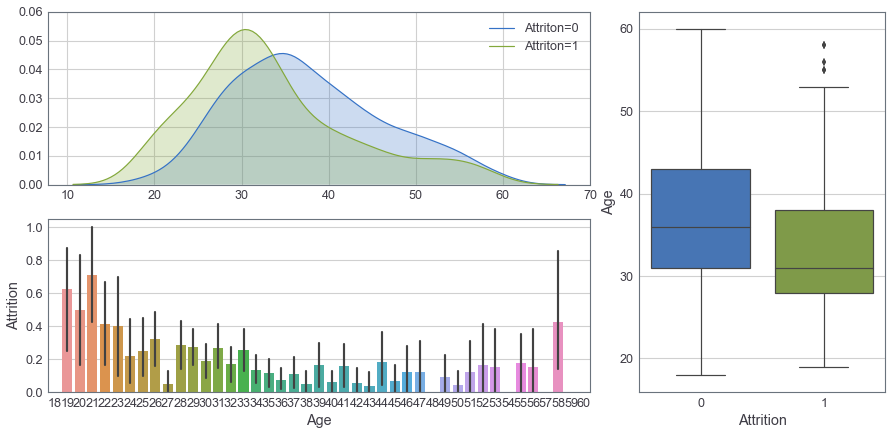

In [310]:
fig = plt.figure(figsize=(15,7))
#facet = sns.FacetGrid(df_train, hue='Attrition', size=8)
#facet.map(sns.kdeplot, 'Age', shade=True)

plt.subplot2grid((2,3),(0,0), colspan=2)
facet = sns.kdeplot(df_train[df_train['Attrition']==0]['Age'], shade=True, label='Attriton=0')
facet = sns.kdeplot(df_train[df_train['Attrition']==1]['Age'], shade=True, label='Attriton=1')
facet.set(ylim=(0, .06))
#facet.add_legend()

plt.subplot2grid((2,3),(1,0), colspan=2)
sns.barplot(x='Age', y='Attrition', data=df_train)

plt.subplot2grid((2,3),(0,2), rowspan=2)
sns.boxplot(x='Attrition', y='Age', data=df_train)

从上面的图可以看出：
1. 离职员工的平均年龄和中位数年龄比未离职员工小；
2. 柱状图和箱形图相互印证了，离职员工的年龄呈两极分布；
3. 22岁以下员工的离职率＞40%，而其他年龄的离职率普遍＜30%；
4. 值得注意的是，58岁的员工离职率也有40%，直观感觉，这个年纪马上要退休了，应该不会离职；
5. 部分年纪的员工离职为0或很低。

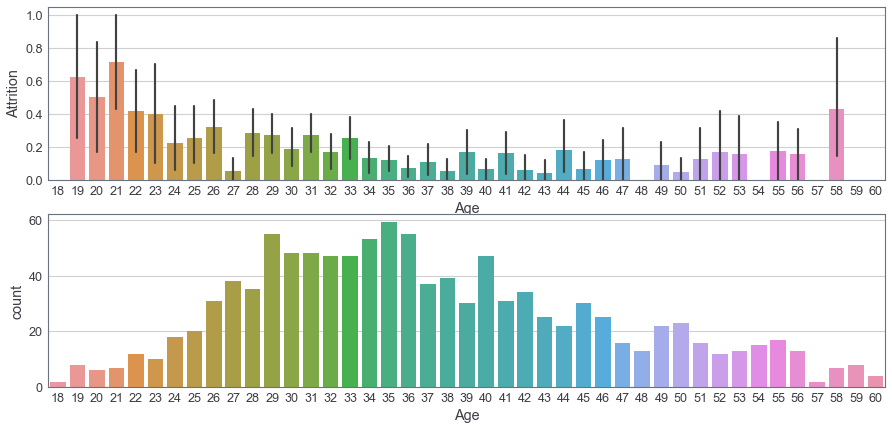

In [311]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,7))
sns.barplot(x='Age', y='Attrition', data=df_train, ax=ax1)
sns.countplot(x='Age', data=df_train, ax=ax2)

从上面的图可以看出，其实在离职率为0或很低的几个年龄，人数非常少，对预测的意义不太大。

### BusinessTravel

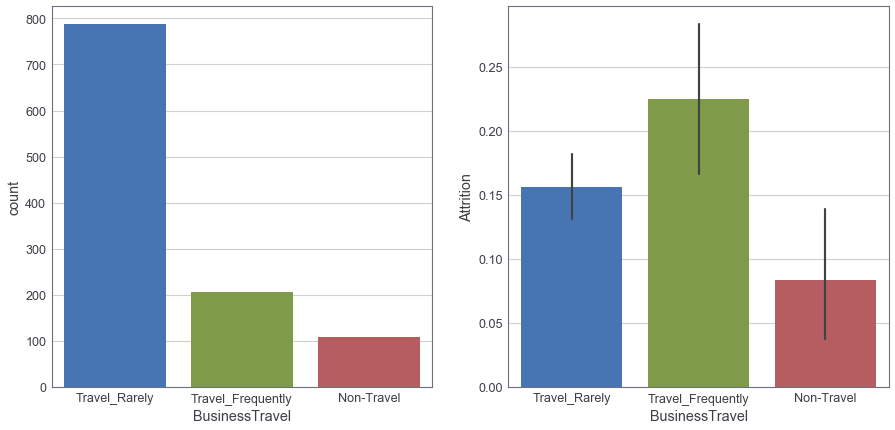

In [312]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='BusinessTravel', data=df_train, ax=ax1)
sns.barplot(x='BusinessTravel', y='Attrition', data=df_train, ax=ax2)

出差的频率和员工的离职率呈正比，<font color='red'>出差频率越高，员工的离职率越高</font>。

### Department

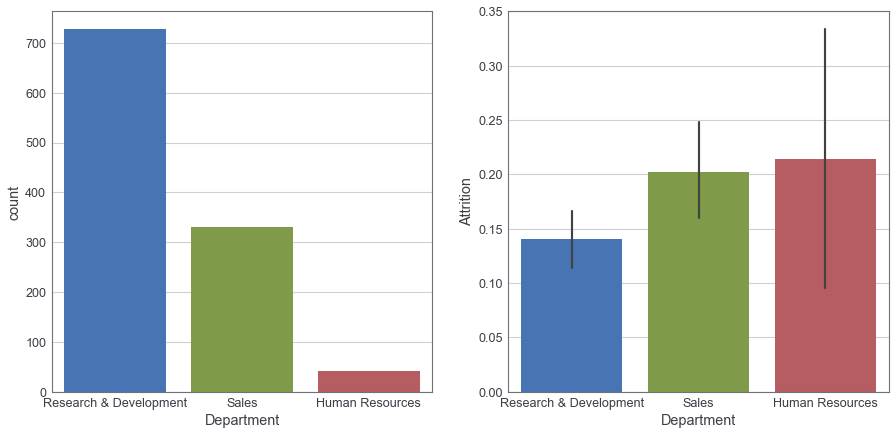

In [313]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='Department', data=df_train, ax=ax1)
sns.barplot(x='Department', y='Attrition', data=df_train, ax=ax2)

### DistanceFromHome

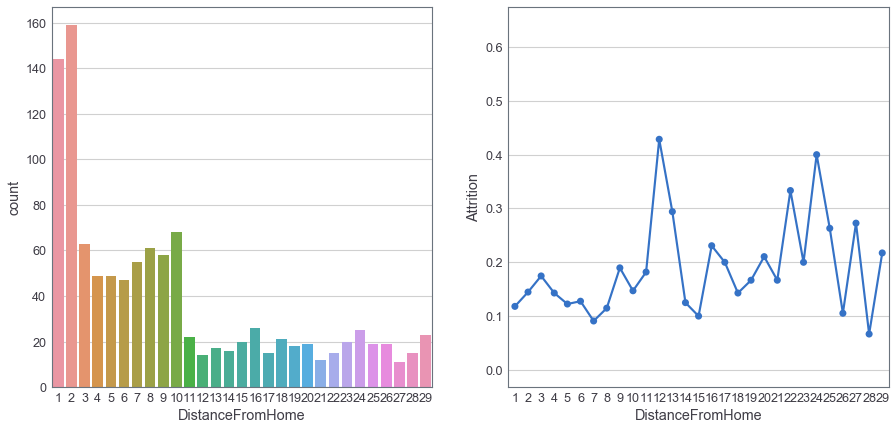

In [314]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='DistanceFromHome', data=df_train, ax=ax1)
sns.pointplot(x='DistanceFromHome', y='Attrition', data=df_train, ax=ax2, errwidth=0)

公司跟家庭住址的距离和离职率并非呈正相关，因此可能还需要和其他的特征结合起来。
### Education

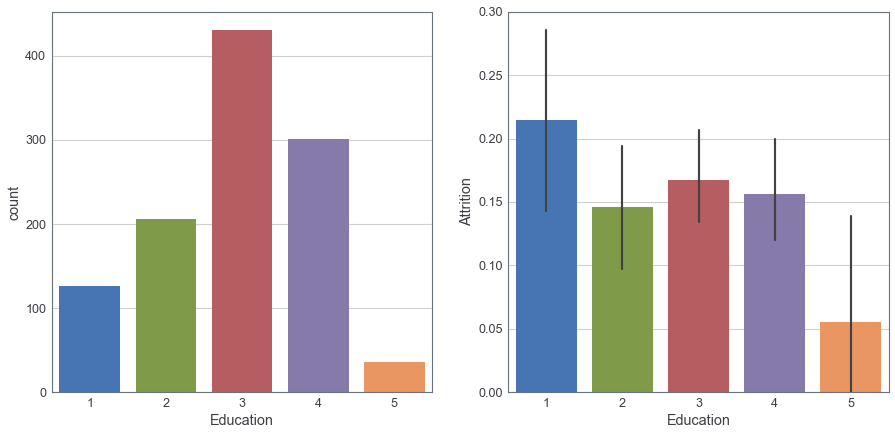

In [315]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='Education', data=df_train, ax=ax1)
sns.barplot(x='Education', y='Attrition', data=df_train, ax=ax2)

受教育程度和员工离职呈两极分化，但是在中间部分没有明显的关系。
### EducationField

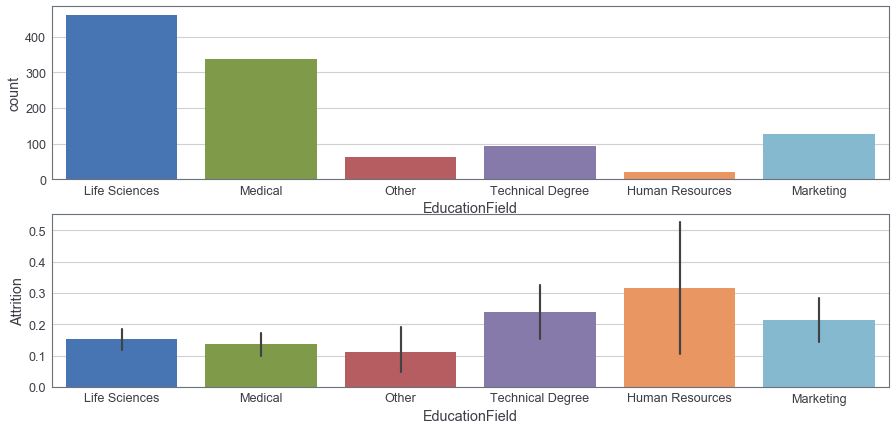

In [316]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,7))
sns.countplot(x='EducationField', data=df_train, ax=ax1)
sns.barplot(x='EducationField', y='Attrition', data=df_train, ax=ax2)

人力资源专业的员工离职率是最高的，结合前面关于部门的分析，可能的原因是人力资源专业员工无法胜任其他部门的岗位。对两个分类做卡方分析。

In [317]:
le = LabelEncoder()
Department = np.array(le.fit_transform(df_train['Department'])).reshape(-1,1)
EducationField = np.array(le.fit_transform(df_train['EducationField'])).reshape(-1,1)
chi2(X=Department, y=EducationField)

(array([ 83.46143905]), array([  1.58176298e-16]))

In [318]:
# 用scipy.stats进行卡方检验
# 首选需要用pd.crosstab得到列联表
d = pd.crosstab(df_train['Department'], df_train['EducationField'])
chi2_contingency(d)

(821.98419918238608,
 3.8704258660579047e-170,
 10,
 array([[   0.72545455,   17.64      ,    4.84909091,   12.86727273,
            2.40545455,    3.51272727],
        [  12.55727273,  305.34      ,   83.93545455,  222.72636364,
           41.63727273,   60.80363636],
        [   5.71727273,  139.02      ,   38.21545455,  101.40636364,
           18.95727273,   27.68363636]]))

两种方式得到的$p<0.05$，拒绝两个特征独立的假设，因此两个特征不是独立的。在训练模型是，只需要选择一个特征。计划选定<font color='red'>Department</font>。
### EnvironmentSatisfaction

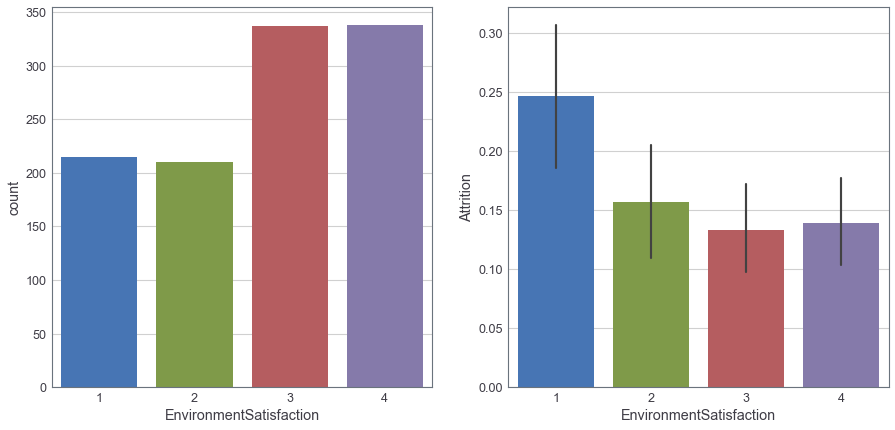

In [319]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='EnvironmentSatisfaction', data=df_train, ax=ax1)
sns.barplot(x='EnvironmentSatisfaction', y='Attrition', data=df_train, ax=ax2)

环境满意度与离职的关系和直观感觉一样，满意度越低，离职率越高。
### Gender

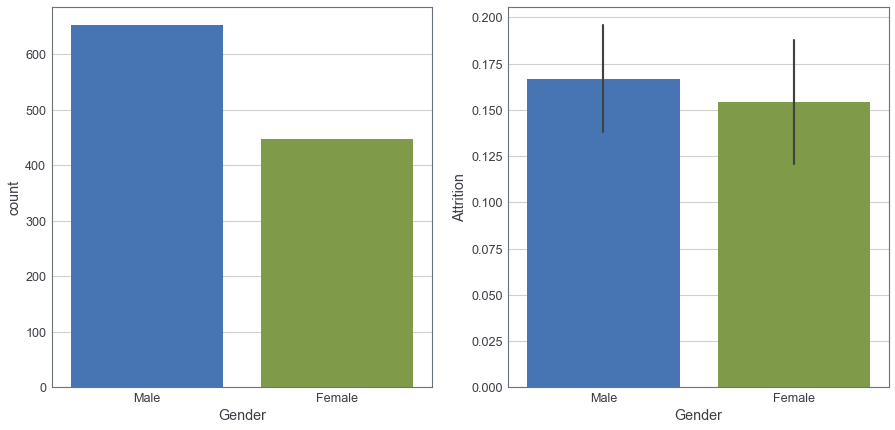

In [320]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='Gender', data=df_train, ax=ax1)
sns.barplot(x='Gender', y='Attrition', data=df_train, ax=ax2)

性别和离职的关系不是很大，男女离职率基本一致。
### JobInvolvement

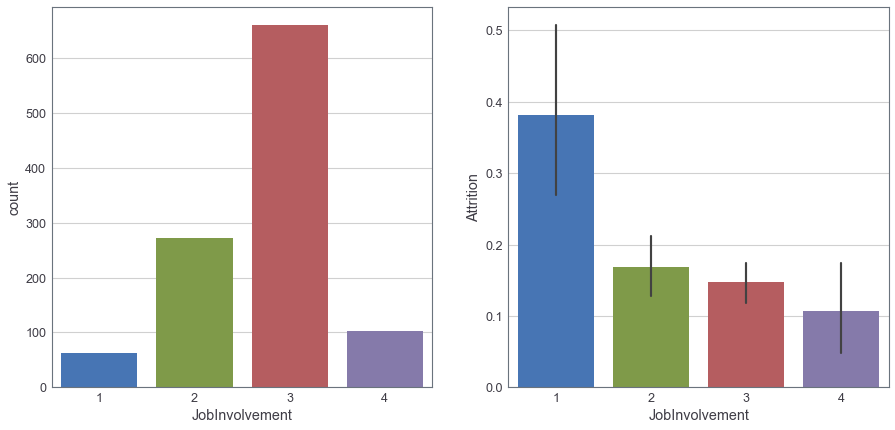

In [321]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='JobInvolvement', data=df_train, ax=ax1)
sns.barplot(x='JobInvolvement', y='Attrition', data=df_train, ax=ax2)

和环境满意度一样，工作投入度越低，离职率越高。
### JobLevel

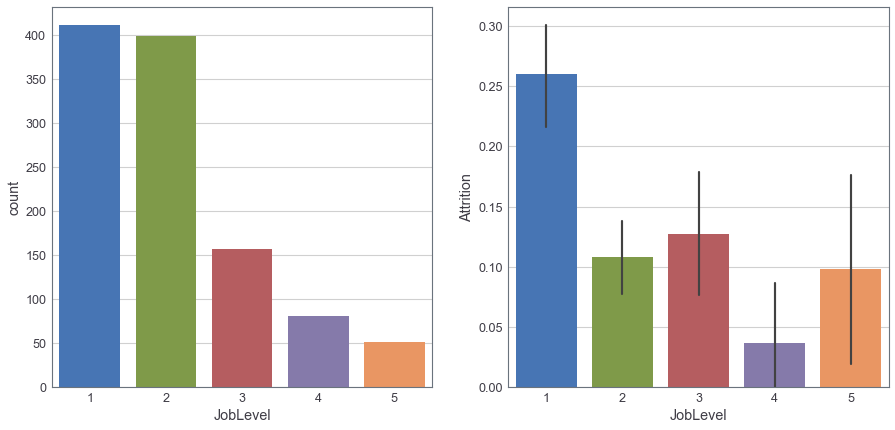

In [322]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='JobLevel', data=df_train, ax=ax1)
sns.barplot(x='JobLevel', y='Attrition', data=df_train, ax=ax2)

职位越高，人数越少。除最低级别外，其他级的离职率看不出有明显的趋势。值得注意的是，级别4的离职率非常低，不到5%。
### JobRole

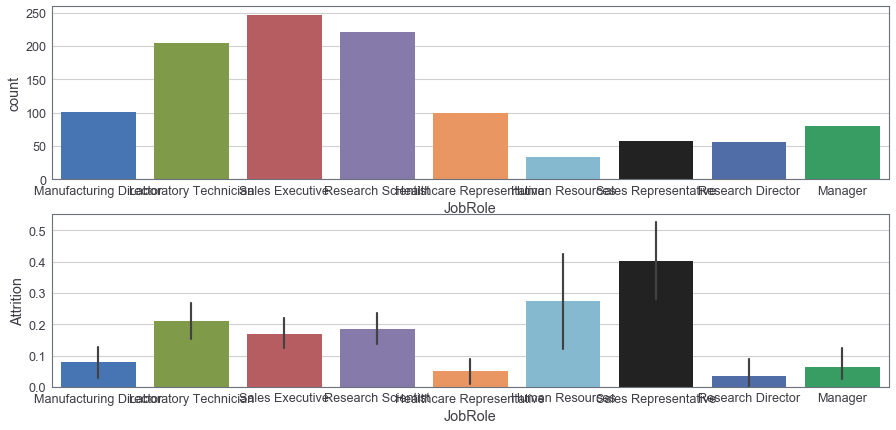

In [323]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,7))
sns.countplot(x='JobRole', data=df_train, ax=ax1)
sns.barplot(x='JobRole', y='Attrition', data=df_train, ax=ax2)

最值得关注的是销售代表这个角色，离职率明显高于其他角色。其次才是人力资源。结合前面的部门的分析，是销售主管的离职率较低造成了销售部的离职率低于人力资源部。

In [324]:
Department = np.array(le.fit_transform(df_train['Department'])).reshape(-1,1)
JobRole = np.array(le.fit_transform(df_train['JobRole'])).reshape(-1,1)
chi2(X=Department, y=JobRole)

(array([ 209.95968323]), array([  5.07538906e-41]))

p值非常小，Department和JobRole不独立。
### JobSatisfaction

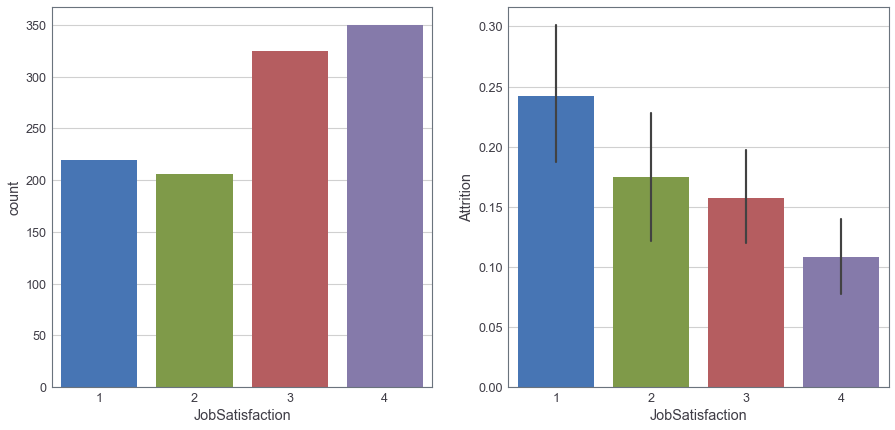

In [325]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='JobSatisfaction', data=df_train, ax=ax1)
sns.barplot(x='JobSatisfaction', y='Attrition', data=df_train, ax=ax2)

工作满意度的人数分布以及其与离职率的关系，看起来和环境满意度很类似；与离职率的关系看起来和工作投入度也很类似。

In [326]:
JobSatisfaction = np.array(le.fit_transform(df_train['JobSatisfaction'])).reshape(-1,1)
EnvironmentSatisfaction = np.array(le.fit_transform(df_train['EnvironmentSatisfaction'])).reshape(-1,1)
chi2(X=JobSatisfaction, y=EnvironmentSatisfaction)

(array([ 0.37075267]), array([ 0.94621578]))

$p=0.95$，不能拒绝独立假设。这两个变量是独立的。

In [327]:
JobInvolvement = np.array(le.fit_transform(df_train['JobInvolvement'])).reshape(-1,1)
chi2(X=JobSatisfaction, y=JobInvolvement)

(array([ 1.36731389]), array([ 0.7132141]))

$p=0.71$，不能拒绝独立假设。这两个变量是独立的。<br>
在几个变量之间居然是独立的。
### MaritalStatus

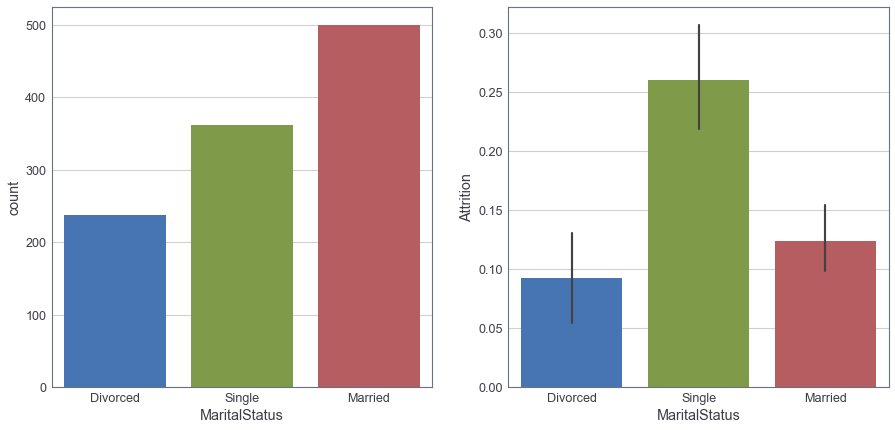

In [328]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='MaritalStatus', data=df_train, ax=ax1)
sns.barplot(x='MaritalStatus', y='Attrition', data=df_train, ax=ax2)

单身人士不拖家带口，离职率是最高的。离异人士需要稳定的工作挣赡养费，因此不会轻易离职。<br>
婚姻状况引起的离职，会不会和性别有关，毕竟已婚女性也许会以家庭为重，离职率会增加。

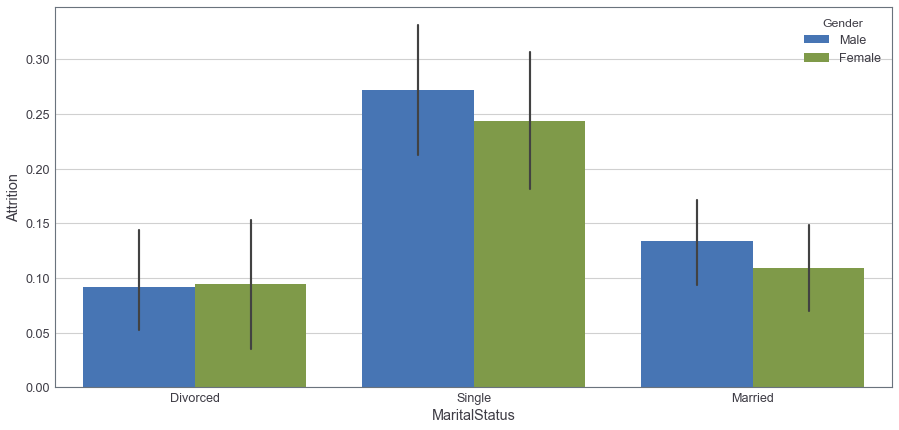

In [329]:
fig = plt.figure(figsize=(15,7))
sns.barplot(x='MaritalStatus', y='Attrition', data=df_train, hue='Gender')

看来判断是错的，婚姻状况造成的离职率差异和性别没关系。男女之间的差别不大。
### MonthlyIncome

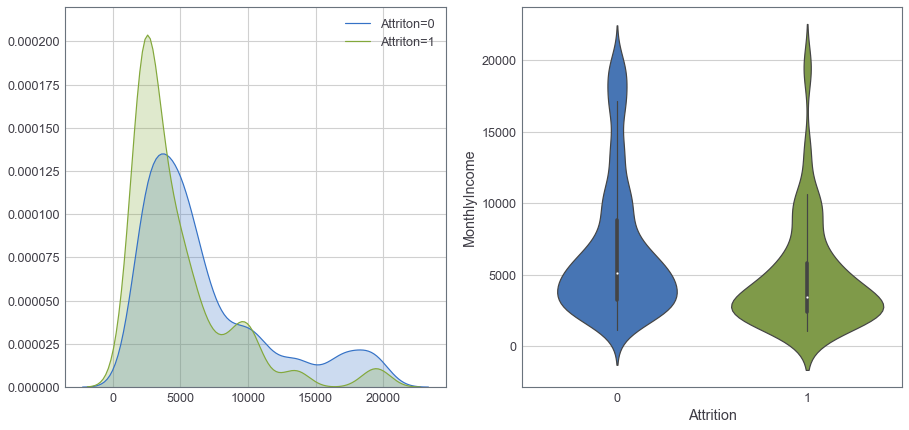

In [330]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

facet = sns.kdeplot(df_train[df_train['Attrition']==0]['MonthlyIncome'],
                    shade=True, label='Attriton=0', ax=ax1)
facet = sns.kdeplot(df_train[df_train['Attrition']==1]['MonthlyIncome'],
                    shade=True, label='Attriton=1', ax=ax1)
facet.set(ylim=(0, .00022))

sns.violinplot(x='Attrition', y='MonthlyIncome', data=df_train, ax=ax2)

离职员工的工资明显低于没有离职的员工。在15000-17000之间，员工是最稳定的，这个区间几乎没有员工离职。

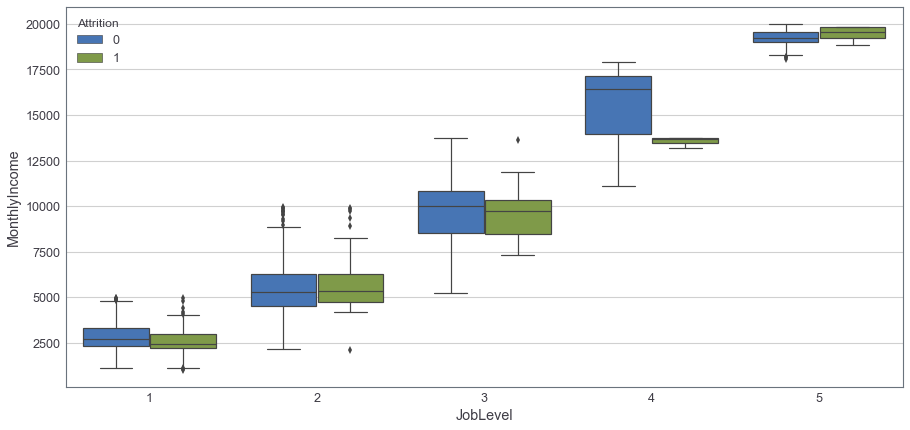

In [331]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(x='JobLevel', y='MonthlyIncome', data=df_train, hue='Attrition')

级别越高，月工资越高。在1，2，3这三个级别，月薪和离职的关系似乎不大，因为不管是否离职，月薪都差不多。但是在级别4，明显可以看出离职员工的月薪低于未离职员工。同时，在级别5，离职员工的月薪反而比未离职员工高，也许是因为这个级别的员工有很多公司挖角，可以找到更好的工作。
### NumCompaniesWorked

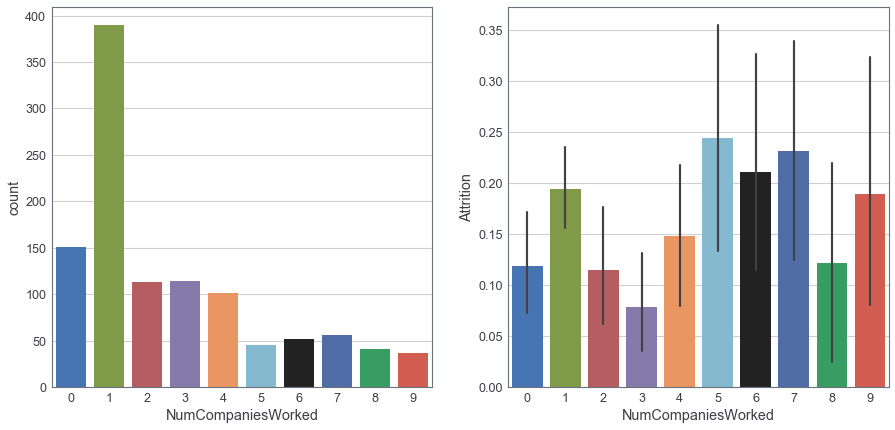

In [332]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='NumCompaniesWorked', data=df_train, ax=ax1)
sns.barplot(x='NumCompaniesWorked', y='Attrition', data=df_train, ax=ax2)

员工曾经工作过的公司数和年龄的分布有点像，这个不难理解，年轻员工工作过的公司数不太可能超过年纪大的员工，如果是这样，这种员工的离职的可能性应该也不会低。

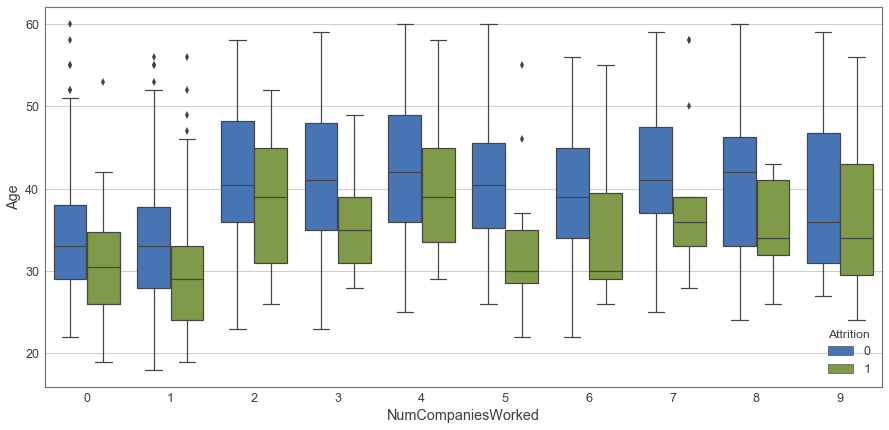

In [333]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(x='NumCompaniesWorked', y='Age', data=df_train, hue='Attrition')

从箱形图中，在工作过的公司数属性中，每个值对应的离职员工年龄都比未离职员工年龄小，只能印证符合整体的年龄分布，没有看出更多的信息。
### OverTime

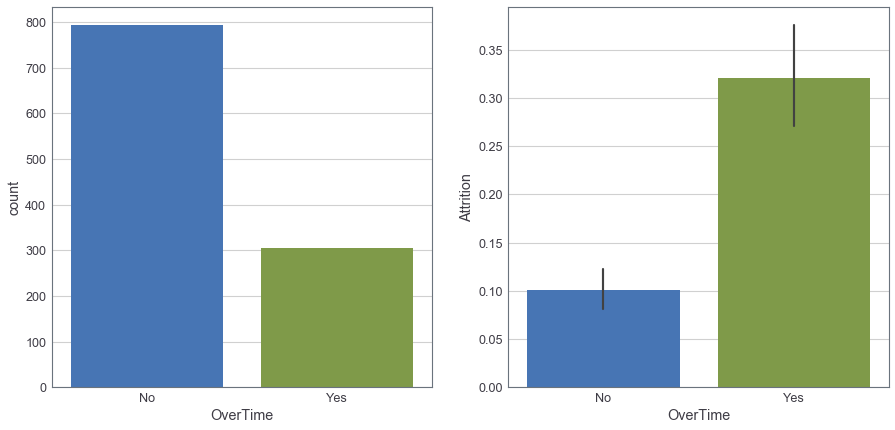

In [334]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='OverTime', data=df_train, ax=ax1)
sns.barplot(x='OverTime', y='Attrition', data=df_train, ax=ax2)

加班的离职率是不加班离职率的3倍，除工作投入度外，这个特征是影响离职率的关键。
### PercentSalaryHike

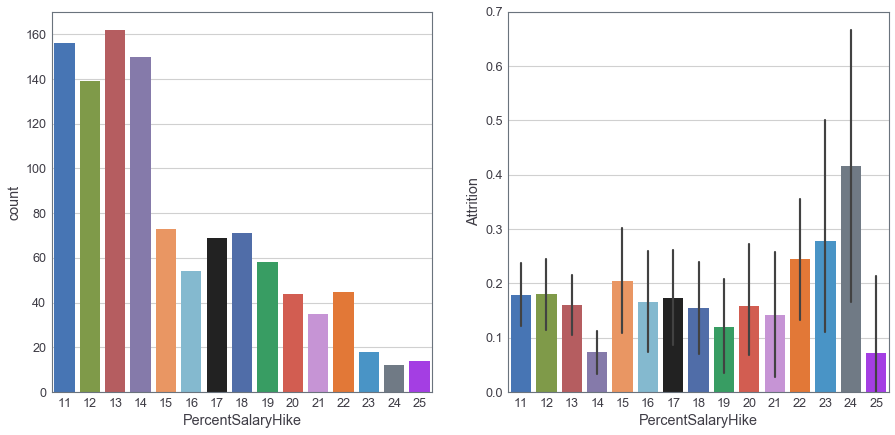

In [335]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='PercentSalaryHike', data=df_train, ax=ax1)
sns.barplot(x='PercentSalaryHike', y='Attrition', data=df_train, ax=ax2)

公司提高24%居然还有40%的人离职，是提高25%的5倍，是什么原因导致这些人离职呢？需要在双变量分析时好好研究。
### PerformanceRating

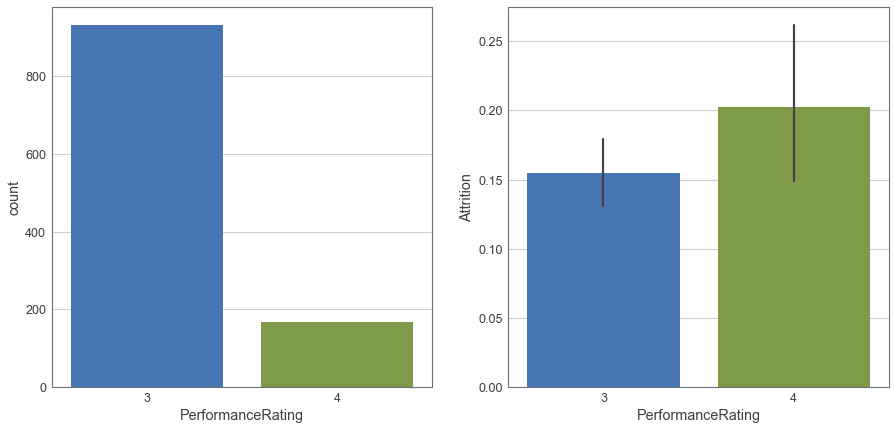

In [336]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='PerformanceRating', data=df_train, ax=ax1)
sns.barplot(x='PerformanceRating', y='Attrition', data=df_train, ax=ax2)

结合前面的工资涨幅，绩效似乎应该和工资涨幅挂钩。

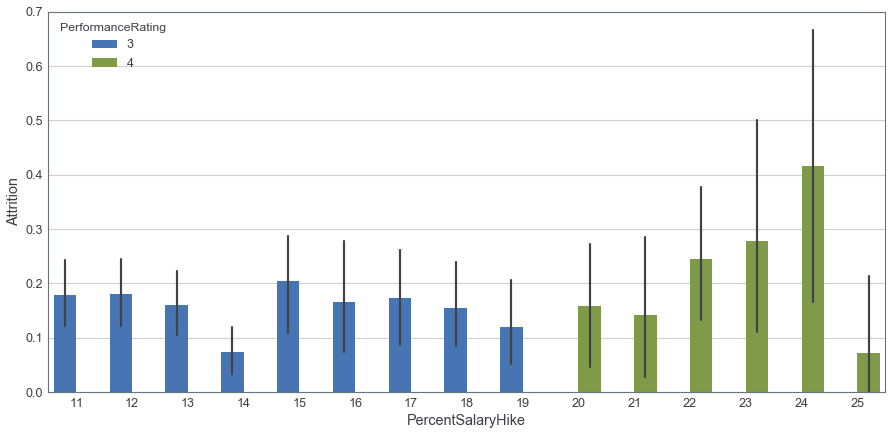

In [337]:
fig = plt.figure(figsize=(15,7))
sns.barplot(x='PercentSalaryHike', y='Attrition', hue='PerformanceRating', data=df_train)

绩效为3时，工资涨幅都不高于19%，看来这两个特征应该是强关联的。

In [338]:
PercentSalaryHike = np.array(le.fit_transform(df_train['PercentSalaryHike'])).reshape(-1,1)
PerformanceRating = np.array(le.fit_transform(df_train['PerformanceRating'])).reshape(-1,1)
chi2(X=PercentSalaryHike, y=PerformanceRating)

(array([ 1997.70756803]), array([ 0.]))

$p=0$，工资涨幅和绩效不是独立的，当绩效被评为4级时，工资涨幅才可能高于20%。
### RelationshipSatisfaction

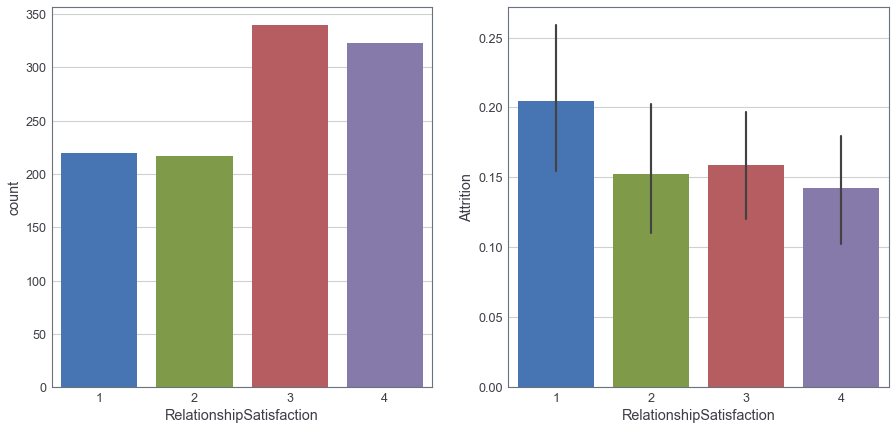

In [339]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='RelationshipSatisfaction', data=df_train, ax=ax1)
sns.barplot(x='RelationshipSatisfaction', y='Attrition', data=df_train, ax=ax2)

关系满意度越低，离职率越高，但是之间的差距也不是很大，最大只相差5%左右。
### StockOptionLevel

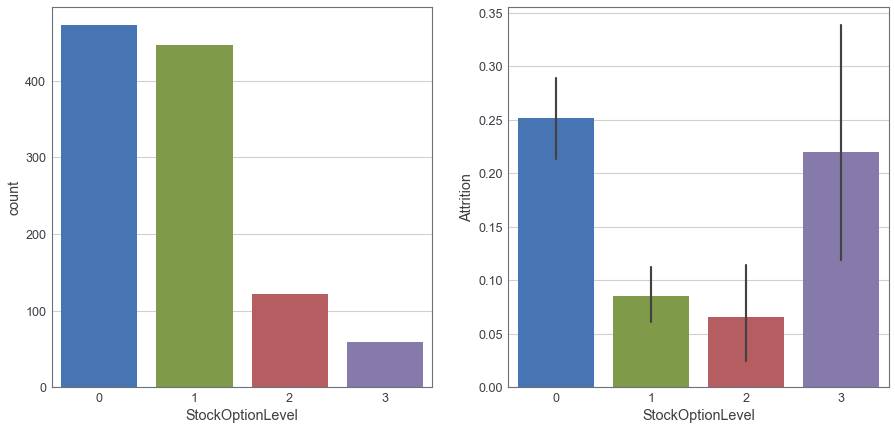

In [340]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='StockOptionLevel', data=df_train, ax=ax1)
sns.barplot(x='StockOptionLevel', y='Attrition', data=df_train, ax=ax2)

股票期权最高和最低的，离职率最高，和1，2的差距还是比较大。
### TotalWorkingYears
总工龄的分布应该和年龄是相关的，不可能出现总工龄比年龄还大的情况。

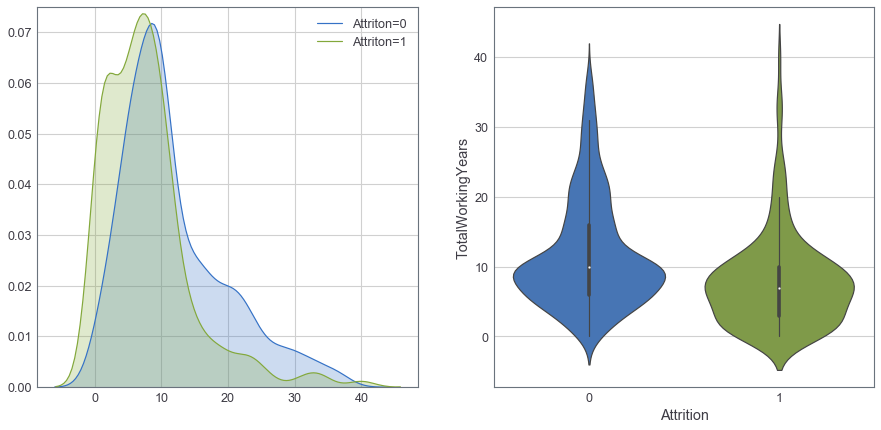

In [341]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

facet = sns.kdeplot(df_train[df_train['Attrition']==0]['TotalWorkingYears'],
                    shade=True, label='Attriton=0', ax=ax1)
facet = sns.kdeplot(df_train[df_train['Attrition']==1]['TotalWorkingYears'],
                    shade=True, label='Attriton=1', ax=ax1)
facet.set(ylim=(0, .075))

sns.violinplot(x='Attrition', y='TotalWorkingYears', data=df_train, ax=ax2)

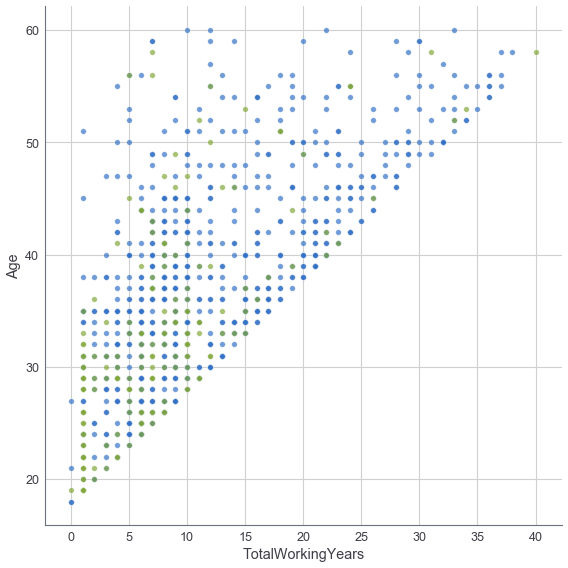

In [342]:
facet = sns.FacetGrid(df_train, hue='Attrition', size=8)
facet.map(plt.scatter, 'TotalWorkingYears', 'Age', alpha=.7, linewidth=.5, edgecolor="white")

果然，两个特征的散点图中出现一个明显的分界线。

In [343]:
(df_train['Age'] / df_train['TotalWorkingYears']).min()

1.45

这条线的斜率是1.45。在年龄和总工龄中，选择总工龄作为预测变量。
### TrainingTimesLastYear

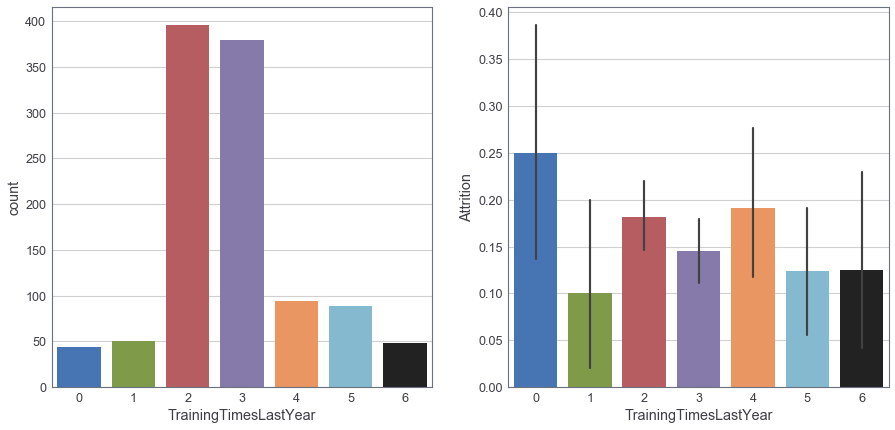

In [344]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='TrainingTimesLastYear', data=df_train, ax=ax1)
sns.barplot(x='TrainingTimesLastYear', y='Attrition', data=df_train, ax=ax2)

培训时长和离职没有很明显的关系，只是培训时长最短，离职率最高。
### WorkLifeBalance

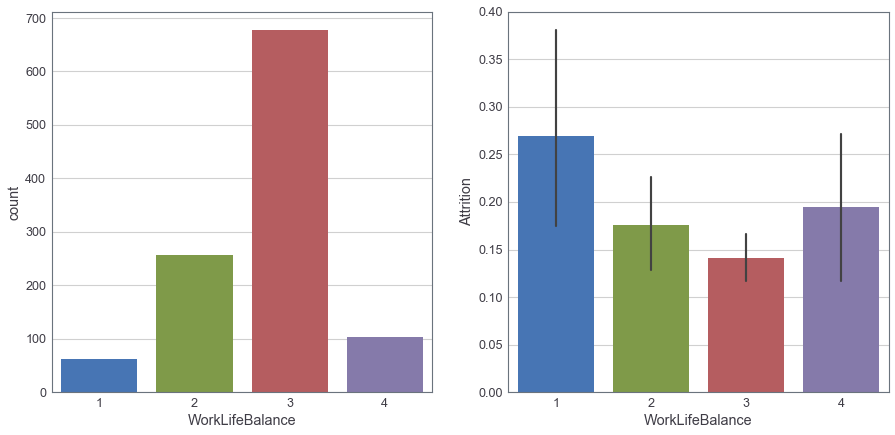

In [345]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(x='WorkLifeBalance', data=df_train, ax=ax1)
sns.barplot(x='WorkLifeBalance', y='Attrition', data=df_train, ax=ax2)

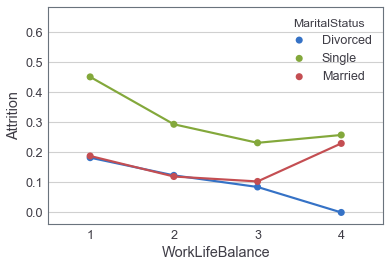

In [346]:
sns.pointplot(x='WorkLifeBalance', y='Attrition', hue='MaritalStatus', data=df_train, errwidth=0)

生活工作能协调平衡的离异人士是绝对不会离职。而离婚人士为了达到工作生活的平衡，似乎只能选择例子。
### YearsAtCompany

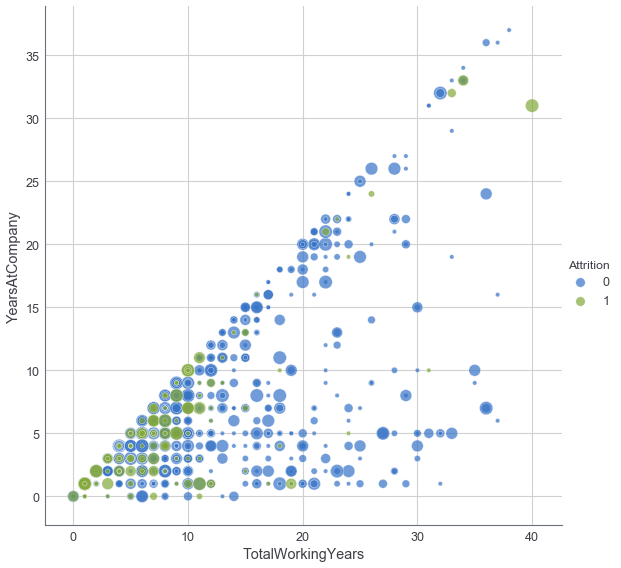

In [347]:
facet = sns.FacetGrid(df_train, hue='Attrition', size=8)
facet.map(plt.scatter, 'TotalWorkingYears', 'YearsAtCompany',
          s=df_train['NumCompaniesWorked']*20,
          alpha=.7, linewidth=.5, edgecolor="white")
facet.add_legend()

从上图可以看出，在目前公司工作的年数和总工龄也有关系。
### YearsInCurrentRole

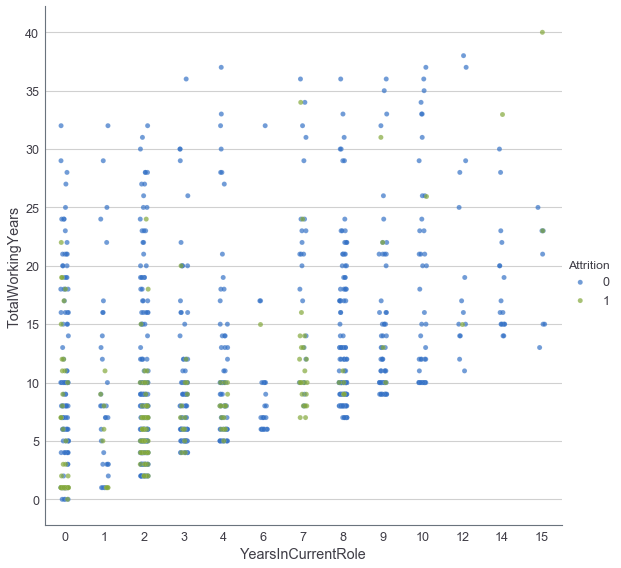

In [348]:
facet = sns.FacetGrid(df_train, hue='Attrition', size=8)
facet.map(sns.stripplot, 'YearsInCurrentRole', 'TotalWorkingYears',
          alpha=.7, linewidth=.1, edgecolor="white", jitter=True)
facet.add_legend()

还是选择总工龄作为特征。
### YearsSinceLastPromotion & YearsWithCurrManager

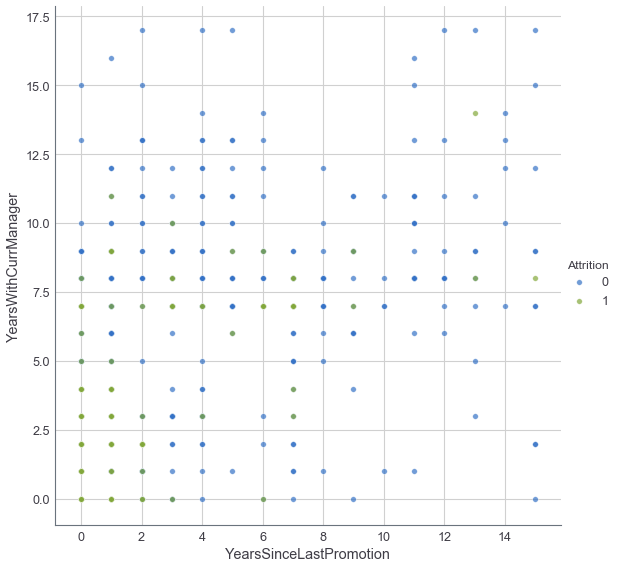

In [349]:
facet = sns.FacetGrid(df_train, hue='Attrition', size=8)
facet.map(plt.scatter, 'YearsSinceLastPromotion', 'YearsWithCurrManager', 
          alpha=.7, linewidth=.5, edgecolor="white")
facet.add_legend()

从这两个特征中，没有发现明显的特征。<br>
## 双变量分析
### 分类变量的独立性检验

In [350]:
# 将字符变量转化为数值型
for col in character_var:
    df[col] = le.fit_transform(np.array(df[col]).reshape(-1,1))

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


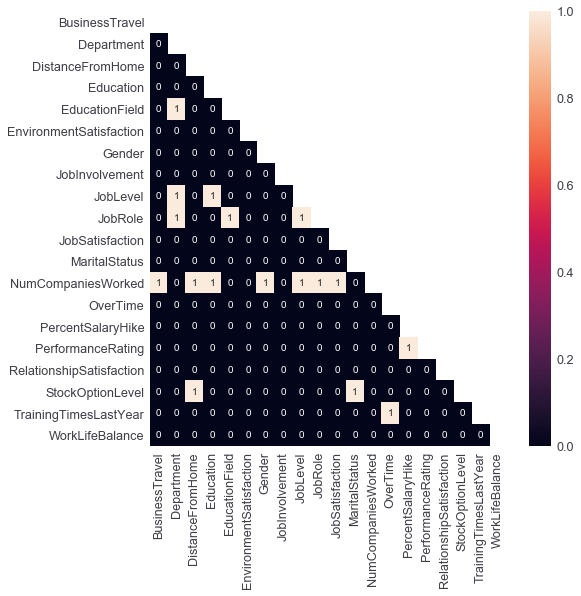

In [351]:
n = len(categorical_var)
chi2_pd = pd.DataFrame(np.zeros((n,n)), index=categorical_var, columns=categorical_var)
for x in range(n):
    for y in range(n):
        if x != y:
            pval = chi2(np.array(df[categorical_var[x]]).reshape(-1,1),
                        np.array(df[categorical_var[y]]).reshape(-1,1))[1]
            if pval >= 0.05:
                # 如果不能拒绝独立假设，值为1
                chi2_pd.iloc[x,y] = 0
            else:
                # 如果拒绝独立假设，值为False
                chi2_pd.iloc[x,y] = 1

fig = plt.figure(figsize=(8,8))
mask = np.zeros_like(chi2_pd)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(chi2_pd, annot=True, mask=mask)

In [382]:
# 将df拆分为train set和test set
df_train = df[df['source']=='train'].copy()
df_test = df[df['source']=='test'].copy()

df_train.drop(['source'], axis=1, inplace=True)
df_test.drop(['source'], axis=1, inplace=True)

#p = chi2(df_train[categorical_var], df_train[target_var])[1]
#pd.DataFrame({'p':p,
#              'name':categorical_var}).sort_values(by='p', ascending=True)

In [357]:
predictor_var = [
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'OverTime',
 'StockOptionLevel']

In [383]:
# 对连续变量归一化
from sklearn.preprocessing import Normalizer
nor = Normalizer()
for col in continuous_var:
    df_train[col] = nor.fit_transform(np.array(df_train[col]).reshape(-1,1))

In [384]:
predictor_var = [x for x in df_train.columns if x != target_var]

## 数据预处理

In [380]:
# 为分类变量创建哑变量
var = []
for col in categorical_var:
    dummy = pd.get_dummies(df[col], prefix=col)
    var.extend(dummy.columns.tolist())
    df = pd.concat([df, dummy], axis=1)
    df.drop([col], axis=1, inplace=True)
    
# 连续变量标准化
#std_scale = StandardScaler()
#for col in continuous_var:
#    df[col] = std_scale.fit_transform(np.array(df[col]).reshape(-1,1).astype(float))

In [359]:
var

['EnvironmentSatisfaction_1',
 'EnvironmentSatisfaction_2',
 'EnvironmentSatisfaction_3',
 'EnvironmentSatisfaction_4',
 'JobSatisfaction_1',
 'JobSatisfaction_2',
 'JobSatisfaction_3',
 'JobSatisfaction_4',
 'OverTime_0',
 'OverTime_1',
 'StockOptionLevel_0',
 'StockOptionLevel_1',
 'StockOptionLevel_2',
 'StockOptionLevel_3']

## 训练模型

In [274]:
# 将df拆分为train set和test set
df_train = df[df['source']=='train'].copy()
df_test = df[df['source']=='test'].copy()

df_train.drop(['source'], axis=1, inplace=True)
df_test.drop(['source'], axis=1, inplace=True)

In [244]:
def classification_func(clf, X, y, test_size=0.3, cv=3): 
    # 交叉验证
    y_pred = cross_validate(clf, X, y, cv=cv)
    print('交叉验证')
    print('='*50)
    print('train score: mean: %.4f'%y_pred['train_score'].mean())
    print('test score: mean: %.4f'%y_pred['test_score'].mean())
    print('\n')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    # 查看精度，召回率和f1
    clf.fit(X_train, y_train)
    result = clf.predict(X_test)
    print(classification_report(y_test, result))
    print('混淆矩阵')
    print('='*50)
    print(confusion_matrix(y_test, result))
    
    return clf

In [360]:
# 采用默认的liblinear算法
classification_func(LogisticRegression(), df_train[predictor_var], df_train[target_var], cv=10)

交叉验证
train score: mean: 0.8475
test score: mean: 0.8455


             precision    recall  f1-score   support

        0.0       0.85      0.98      0.91       272
        1.0       0.62      0.17      0.27        58

avg / total       0.81      0.84      0.80       330

混淆矩阵
[[266   6]
 [ 48  10]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [362]:
# 采用saga算法
classification_func(LogisticRegression(solver='saga', random_state=0, max_iter=500),
                    df_train[predictor_var], df_train[target_var], cv=10)

交叉验证
train score: mean: 0.8475
test score: mean: 0.8455


             precision    recall  f1-score   support

        0.0       0.84      0.97      0.90       274
        1.0       0.47      0.12      0.20        56

avg / total       0.78      0.83      0.78       330

混淆矩阵
[[266   8]
 [ 49   7]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

当采用saga损失函数优化算法时，性能上变化不大。下面使用GridSearchCV，对liblinear进行参数搜索，寻找最优参数。

In [373]:
param_grid = {'C': [0.01, 0.1, 1],
              'tol': [1e-6, 1e-5, 1e-4],
              'class_weight': ['balanced', None],
              'penalty':['l1', 'l2']}

grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid, verbose=0, cv=10)
grid_search.fit(df_train[predictor_var], df_train[target_var])
print("\nBest score: %0.3f" % grid_search.best_score_)
print('='*90)
print(grid_search.best_estimator_)


Best score: 0.848
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)


In [374]:
model = classification_func(grid_search.best_estimator_,
                            df_train[predictor_var],
                            df_train[target_var],
                            cv=10)

交叉验证
train score: mean: 0.8464
test score: mean: 0.8482


             precision    recall  f1-score   support

        0.0       0.83      1.00      0.91       273
        1.0       0.67      0.04      0.07        57

avg / total       0.80      0.83      0.76       330

混淆矩阵
[[272   1]
 [ 55   2]]


经过参数的优化，可以看出，虽然整体的准确率提升不大，但是更多的未离职员工（0）被准确，同时导致离职员工也被预测为0，这样就导致了precision上升，同时recall降低。

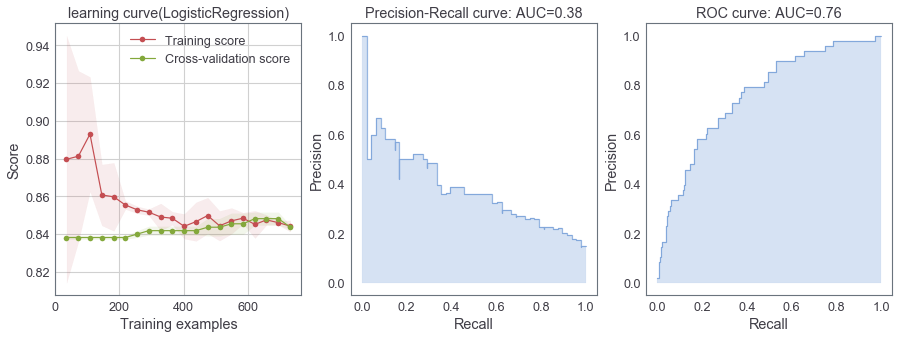

In [369]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
va.plot_learning_curve(model,'learning curve(LogisticRegression)',
                    df_train[predictor_var],df_train[target_var],ax=ax[0])
va.plot_pr_curve(model, df_train[predictor_var],df_train[target_var],ax=ax[1])
va.plot_roc_curve(model, df_train[predictor_var],df_train[target_var],ax=ax[2])

## 随机森林

In [370]:
df_train = pd.read_csv('./dataset/pfm_train.csv')
df_test = pd.read_csv('./dataset/pfm_test.csv')

df_train['source'] = 'train'
df_test['source'] = 'test'

df = pd.concat([df_train, df_test], axis=0)
df.drop(['Over18','StandardHours','EmployeeNumber'],axis=1,inplace=True)

# 将字符型数据数值化
#le = LabelEncoder()
for col in character_var:
    df[col] = le.fit_transform(df[col])

#for col in continuous_var:
#    df[col] = std_scale.fit_transform(np.array(df[col]).reshape(-1,1).astype(float))
    
df_train = df[df['source']=='train'].copy()
df_test = df[df['source']=='test'].copy()

df_train.drop(['source'], axis=1, inplace=True)
df_test.drop(['source'], axis=1, inplace=True)

#predictor_var = [x for x in df_train.columns if x != target_var]

In [385]:
# 训练随机森林分类器
clf = classification_func(RandomForestClassifier(n_estimators=500,
                                                 max_features='sqrt',
                                                 min_samples_leaf=1,
                                                 max_depth=20),
                          df_train[predictor_var],
                          df_train[target_var],
                          cv=10)

交叉验证
train score: mean: 1.0000
test score: mean: 0.8600


             precision    recall  f1-score   support

        0.0       0.82      0.99      0.90       268
        1.0       0.71      0.08      0.14        62

avg / total       0.80      0.82      0.76       330

混淆矩阵
[[266   2]
 [ 57   5]]


In [372]:
result = clf.predict(df_test[predictor_var])
pd.DataFrame({'result':result.astype(int)}).to_csv('result.csv')

In [386]:
feature = pd.DataFrame({'importance':clf.feature_importances_,
                        'name':predictor_var}).sort_values(by='importance', ascending=False)
feature

,importance,name
95,0.034974,OverTime_1
94,0.032574,OverTime_0
63,0.031953,JobLevel_1
6,0.022817,YearsWithCurrManager
77,0.020925,JobSatisfaction_1
83,0.019554,MaritalStatus_2
53,0.017637,EnvironmentSatisfaction_1
117,0.017407,StockOptionLevel_0
76,0.017159,JobRole_8
85,0.016782,NumCompaniesWorked_1


In [286]:
classification_func(clf,
                    df_train[feature[:10]['name'].tolist()],
                    df_train[target_var],
                    cv=10)

交叉验证
train score: mean: 0.9959
test score: mean: 0.8436


             precision    recall  f1-score   support

        0.0       0.85      0.97      0.90       274
        1.0       0.50      0.16      0.24        56

avg / total       0.79      0.83      0.79       330

混淆矩阵
[[265   9]
 [ 47   9]]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

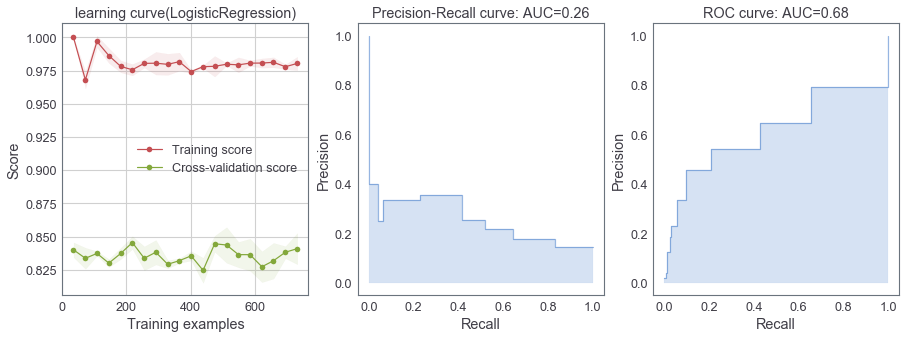

In [255]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
va.plot_learning_curve(clf,'learning curve(LogisticRegression)',
                    df_train[predictor_var],df_train[target_var],ax=ax[0])
va.plot_pr_curve(clf, df_train[predictor_var],df_train[target_var],ax=ax[1])
va.plot_roc_curve(clf, df_train[predictor_var],df_train[target_var],ax=ax[2])

默认参数的随机森林过拟合太严重。

In [257]:
param_grid = {'n_estimators': [10, 20, 50, 100],
              'max_features': ['sqrt', 'log2', 3],
              'min_samples_leaf': [1]
             }

grid_search = GridSearchCV(clf, param_grid=param_grid, verbose=0, cv=10)
grid_search.fit(df_train[predictor_var], df_train[target_var])
print("\nBest score: %0.3f" % grid_search.best_score_)
print('='*90)
print(grid_search.best_estimator_)


Best score: 0.852
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [258]:
clf = classification_func(grid_search.best_estimator_,
                          df_train[predictor_var],
                          df_train[target_var],
                          cv=10)

交叉验证
train score: mean: 0.9933
test score: mean: 0.8382


             precision    recall  f1-score   support

        0.0       0.88      0.97      0.92       283
        1.0       0.50      0.19      0.28        47

avg / total       0.82      0.86      0.83       330

混淆矩阵
[[274   9]
 [ 38   9]]


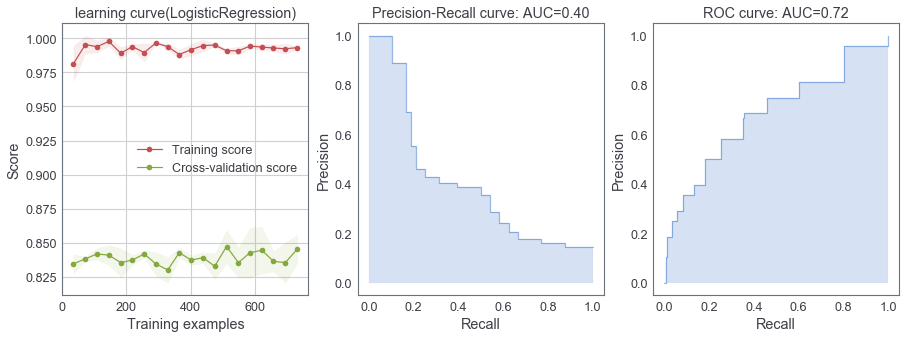

In [259]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
va.plot_learning_curve(clf,'learning curve(LogisticRegression)',
                    df_train[predictor_var],df_train[target_var],ax=ax[0])
va.plot_pr_curve(clf, df_train[predictor_var],df_train[target_var],ax=ax[1])
va.plot_roc_curve(clf, df_train[predictor_var],df_train[target_var],ax=ax[2])

In [280]:
feature = pd.DataFrame({'importance':clf.feature_importances_,
                        'name':predictor_var}).sort_values(by='importance', ascending=False)
feature

ValueError: arrays must all be same length

In [261]:
feature[:5]

,importance,name
3,0.117122,EnvironmentSatisfaction
2,0.111037,Education
9,0.106074,RelationshipSatisfaction
10,0.095545,StockOptionLevel
7,0.093416,OverTime


In [266]:
classification_func(clf,
                          df_train[feature[:5]['name'].tolist()],
                          df_train[target_var],
                          cv=10)

交叉验证
train score: mean: 0.8934
test score: mean: 0.8237


             precision    recall  f1-score   support

        0.0       0.86      0.96      0.91       277
        1.0       0.50      0.19      0.27        53

avg / total       0.80      0.84      0.81       330

混淆矩阵
[[267  10]
 [ 43  10]]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)